# Wstęp

Kontrolowanie chaosu jest bardzo istotną częścią procesów inżynieryjnych szczególnie w elektronice i układach mechanicznych. Istnieją dwa typy kontroli: kontrola z i bez sprzężenia zwrtonego. 
Układ chaotycznego atraktora składa sie z nieskończonej ilości niestabilnych orbit periodycznych. Kontrola takich układów polega na stosowaniu niestabilnych orbit w celu opanowania i konrtolowania chaosu, jedną z metod, która można wykorzystać jest metoda Ott-Gerbogi-Yorke'a. Stosuje ona odpowiednio dobrane tymczasowe perturbacje parametrów wpływających na układ rozpraszający się, pozwalając na przezmianę z chaotycznej trajektorii w porządany punkt ustalony lub periodyczną orbitę, wykorzystując przy tym sprzężenie zwrotne. Stosuje się tą metodę w odwzorowaniach dwu i jednowymiarowych, które należą do odwzorowań logstycznych lub odwzorowań Hénona. 
Kontrolowanie może również odbyć się przez połączenie okresowych modulacji z parametrem kontrolującym, czy nawet łączeniem dwóch chaotycznych układów.


# Metoda Ott-Yorke-Grebogi'ego

## Odwzorowanie jednowymiarowe

By zrozumień działanie metody Ott-Grebogi-Yorke'a oraz w jaki sposób stabilizuje ona niestabilne okresowe orbity osadzone w otoczeniu chaotycznego atraktora wykorzystamy prosty układ bazujący na odwzorowaniu logistycznym:
$$ x_t+1 = f(x_t ,r) = rx_t (1 - x_t) $$
gdzie x jest ograniczony interwałem jednostkowym $[0,1]$, a parametr r należy do przedziału (3,4).
Odwzorowanie logistyczne tworzy chaos poprzez bifurkacje podwajającą okres, która kumuluje się w dla $r = r_{\infty} \approx 3.57$
Ten układ dla wartości $r = 3.8$ jest pozornie chaotyczny i chaotyczny atraktor mieści się w interwale $[0,1]$ oraz składa z nieskończonej ilości niestabilnych okresowych orbit osadzonych w nim. \
Załóżmy teraz, że chcemy uniknąć chaosu występującego dla $r = 3.8$. Trajektorie, które chcemy uzyskać mogą mieć dowolny losowo wybrany punkt początkowy $x_0$ i muszą się znajdować jak najbliżej możliwej 2 okresowej orbity zajkładając, że ta 2 okresowa orbita daje najlepsze "osiągi" układu. Możemy wybrać porządany asymptotyczny stan z odwzorowania, z którejkolwiek z nieskończonej liczby niestabilnych orbit okresowych. Aby osiągnąc nasz cel zakładamy, że r można będzie delikatnie dostosować w bardzo małym przedziale w okolicach $r_0 = 3.8$. R będzie się mogło zmieniać w przedziale $[ r_{0} - \delta, r_{0} + \delta ]$, gdzie $\delta \ll 1$, z natury atraktora, każdy trajektoria zaczynająca się w jakimś $x_{0}$ spadnie w kierunku okolicy wybranej przez nas 2 okresowej orbity po jakimś czasie, jeżeli jednak w żaden sposób nie zareagujemy, to szybko się od niej oddali. Wcześniej wspomniane małe perturbacje będą zależeć od czasu. Logistyczne odwzorowanie w okolicy okresowej orbity może zostać przybliżone przy pomocy liniowych równań rozwiniętych wokół tej okresjowej orbity. Niech naszym celem będzie m okresowa orbita, która będzie kontrolowana przez $x(i), i = 1, ... ,m$ gdzie $x(i+1) = f[x(i)]$ i $x(m+1) \equiv x(1)$ . Zakładamy, że w czasie t trajektoria spada w okolice i-tej składowej m okresowej orbity. Zlinearyzowana dynamika w tej okolicy $(i+1)$ -tej składowej przybiera formę: 
$$x_t+1 - x(i+1) = \frac{ \partial f(x,r)}{\partial x}\vert _{x=x(i),r=r_0} (x_t - x(i)) + \frac{ \partial f(x,r)}{\partial r}\vert _{x=x(i),r=r_0} \Delta r_t$$
Gdzie pochodne cząstkowe są obliczane w $x = x(i)$ i $r = r_0$ i otrzymujemy:
$$x_{t+1} - x(i+1) = r_0 (1-2x(i))(x_t 0 x(i))+ x(i)(1 - x(i))\Delta r_t$$
Wymagane jest aby $x_{t+1}$ zostało w okolicy $x(i + x)$, więc zakładamy:
$$\vert x_t+1 - x(i+1) \vert = 0$$
Z tego wynika, że:
$$\Delta r_t = r_0 \frac{(2x(i) - 1)(x_t - x(i))}{x(i)(1-x(i))}$$
To równanie trzyma trajektorie $x_t$, w momencie gdy ta trafi w bliską okolicę m cyklicznej orbity, czyli kiedy $\vert x_t - x(i)\vert \rightarrow 0$. Więc wymagana perturbacja parametru $\Delta r_t$ jest mała. Niech długość małego interwału definiująca okolice dookoła każdego ze składowej m okresowej orbity będzie wynosić $2 \epsilon$. Z reguły maksymalna permutacja $\delta$ jest proporcjonalna do $\epsilon$. Ponieważ $\epsilon$ może być arbitralnie mały i $\delta$ również taka może być. Jeżeli jednak średni czas przejścia w okolice docelowej okresowej orbity zależy od $\epsilon$ (lub $\delta$), większa $\delta$ skutkuje krótszym średnim czasem nim trajektoria będzie konrtolowana, jednak zbyt duża sprawi, że efekty nieliniowe staną się znaczne i liniowe podejście do kontrolowania trajektorii nie wystarczy. Perturbacje parametrów dopiero zostają zastosowane, gdy trajektoria wchodzi w okolice docelowej orbity okresowej, kiedy nie są one one w użyciu układ rozwija się dla nominalnej wartości parametru $r_0$, zazywczaj wtedy $\Delta r_t = 0$, dla $\Delta r_t > \delta$. Perturbacje parametru $\Delta r_t$ zależą od $x_t$, więc zależą również od czasu.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#controlling logistic map fixed point
x = [0.28] #init value
r0 = 3.8 #control param
T = 700 #number of iterations
count = 0
eps = 0.001

xf = 1.0 - 1.0/r0 # fixed point
r = r0

In [3]:
for t in range(T):
    x.append(r*x[-1]*(1.0-x[-1]))
    count += 1
    if abs(x[-1]-xf) < eps:
        #print("in eps neighbourhood \n count: {}".format(count))
        delta = r0*(2.0*xf-1.0)*(x[-1]-xf)/(xf*(1.0-xf))
        #print("delta = {}".format(delta))
        r = r0 + delta
        #print("x = {}".format(x[-1]))

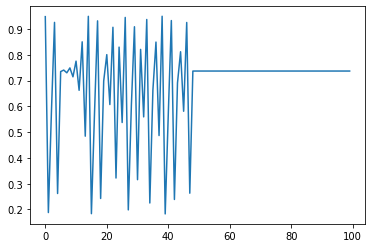

In [4]:
plt.plot(x[-100:])

In [5]:
#controling logistic map period-two orbit
x = [0.28] #init value
r0 = 3.8 #control param
T = 400 #number of iterations
count = 0
eps = 0.001

#periodic points
ab = (1.0 + 1.0/r0)
xp1 = ab/2.0 + (-ab/r0 + ab*ab/4.0)**0.5
xp2 = ab/2.0 - (-ab/r0 + ab*ab/4.0)**0.5

print("xp1 = {:.4f}".format(xp1))
print("xp2 = {:.4f}".format(xp2))

r = r0

xp1 = 0.8894
xp2 = 0.3737


In [6]:
for t in range(T):
    x.append(r*x[-1]*(1.0-x[-1]))
    count += 1
    if abs(x[-1]-xp1) < eps:
        delta = r0*(2.0*xp1 - 1.0)*(x[-1] - xp1)/(xp1*(1.0 - xp1))
        r = r0 + delta
    elif abs(x[-1]-xp2) < eps:
        delta = r0*(2.0*xp2 - 1.0)*(x[-1] - xp2)/(xp2*(1.0 - xp2))
        r = r0 + delta

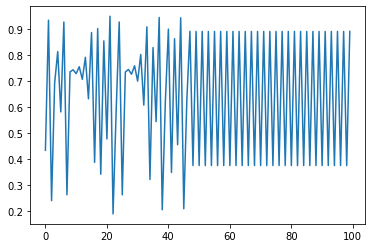

In [7]:
plt.plot(x[-100:])

##  Układy równań różnicowych
Roważmy układ:
$$x_{t+1}=f(x,r)$$
gdzie $x_t \in R^n, r \in R$ i $f$ jest dostatecznie gładka w sostunku do obu zimennych, r stanowi rzeczywisty parametr, który jest osiągalny dla zewnętrznych korekt, ale jest ograniczony do małego interwału $\vert r - r_0\vert < \delta$ w okolicach wartości nominalnej $r_0$. Zakładamy że układ nominalny(,czyli dla $r = r_0$) posiada chaotyczny atraktor. Parametr kontrolujący r zmieniamy w odniesieniu do czasu w taki sposób, aby dla prawie wszystkich warunków początkowych w obrębie atraktora chaotycznego dynamika sprowadzała je do upragnionej czasowo okresowej orbicie składającej się na atraktor. Przyjęta strategia jest następująca, pierwsze znajdujemy lokalne stabilizujące prawo ze sprzężeniem zwrotnym, które zdefiniowane jest w obrębie okolicy porządanej okresowej orbity. Robi się to poprzez analizę przybliżenia pierwszego rzędu takiego układu w wybranej niestabilnej okresowej orbicie, w tym momencie zakładamy, że istnieje możliwośc stabilizacji w naszym przybliżeniu. Ponoieważ możliwośc stabilizacji jest ogólną własnością systemów liniowych, takie zalożenie jest uzasadnione. Ergodyczna natura układów chaotycznych zapewnia nas, że aktualny stan trajektorii w końcu trafi do wybranej okolicy. Gdy się w niej znajdzie stosujemy stabilizujące prawo ze sprzężeniem zwrotnym, które pozwala nam sterować trajektorię w kierunku porządanej orbity. 
Ponieważ kontrolowanie niestabilnej okresowej orbity $x_{P,i} \in R^n$ z $i = 1, ... , P$, gdzie $P$ oznacza długośc okresu, może zostać osiągnięte poprzez małe, dokładnie określone wariacje układem parametów wraz z każdą iteracja t.
Więc musimy roważyć układ sprarametryzowany:
$$x_{t+1} = f(x_t,r_t)$$
Poprzez lekką zmianę $r_t$ punkty okresowe również lekko się przesuna, tzn. $x_{P,i}$ dla $i = i, ... , P$.
Ta metoda jest opisywana jako stosowana w stabilizacji punktów ustalonych (to jest orbit jednookresowych) odwzorowania f. Rozwarzanie orbit o okresie większym niż jeden jest stosunkowo proste. Niech $x^* (r)$ określa niestabilny ustalony punkt w atraktorze. Dla wartości $r$ oraz zbliżonych do $r_0$ i w okolicy punktów ustalonych $x^* (r_0)$ odwzorowane może byćprzybliżone jako liniowe odwzorowanie
$$x_{t+1}-x^* (r) = A[x_t - x^* (r_0)] + B(r-r_0)$$
Gdzie A to n-ta macierz Jakobianu, a B to n-wymiarowa kolumna wektora
$$A := D_x f(x,r),    B := D_r f(x,r)$$
Pochodne cząstkowe w punktcie $x=x^* (r_0)$ i $r = r_0$. Wprowadzimy teraz zależność od czasu parametru r przez założenie, że jest on liniową funkcją $x_t$ w formie
$$r - r_0 = -K^T (x_t - x^* (r_0))$$
Macierz $K^T$ w formie $1 \times n$ musi być tak określona, aby ustalony punkt $x^* (r_0)$ stał się stabilny. W wyniku tego uzyskujemy
$$x_{t+1} - x^* (r_0) = (A - BK^T)(x_t - x^* (r_0))$$
pokazuje to, że ustalony punkt będzie stabilny jeśli macierz $n \times n$
$$A - BK^T$$
jest asymptotycznie stabilna: to wystarczy, wszystkie wartości własne posiadają modulo mnieższę od jedności. Rozwiązanie problemu determinacji $K^T$, takie aby wartości własne macierzy $A - BK^T$ miały określone watości jest bardzo znanym problemem w teorii kontroli nad układami i nazywa się \emph{techniką umieszczenia bieguna (pole placement technique)}
Jako przykład roważmy odwzorowanie Hénona w formie
$$x_{1t+1} = a + bx_{2t}-x^2_{1t},    x_{2t+1} = x_{1t}$$
Dla $b = 0.3$ i $a = \bar{a} = 1.4$ istnieje niestabilny punkt siodłowy zawarty w chotycznym atraktorze. Ten punkt ustalony jest określony przez
$$x^*_1 = -c + \sqrt{c^2 + a},    x^*_2 = x^*_1$$
gdzie $c = (1 - b)/2$ i $a \ge -c^2$. Otrzymujemy
\begin{equation*}
    A = D_x f(x) = 
    \begin{pmatrix}
    -2x_1 & b\\
    1 & 0\\
    \end{pmatrix}
    , B = D_x f(x) = 
    \begin{pmatrix}
        1\\
        0\\
    \end{pmatrix}
\end{equation*}
Wartości własne i wektory własne A są opisane przez
\begin{equation*}
       \lambda_s = -x_1 + \sqrt{b+x^2_1}, 
       \begin{pmatrix}
           \lambda_s\\
           1\\
       \end{pmatrix}
       , \lambda_u = - x_1 - \sqrt{b+x^2_1},
       \begin{pmatrix}
           \lambda_u\\
           1\\
       \end{pmatrix}
\end{equation*}
Macierz $A - BK^T$ jest opisana przez
\begin{equation*}
    A - BK^T = 
    \begin{pmatrix}
        -2x^*_1 - k_1 & b - k_2\\
        1 & 0
    \end{pmatrix}
\end{equation*}

In [8]:
#Control Henon
T = 3450 #number of iterations
x = [-0.760343]; y = [1.40007] #init values
a = 1.4; b = 0.3; a0 = a
#unstable fixed point
c = (1.0 - b)/2.0
xf = -c + (c*c + a)**0.5
yf = xf
print("xf = yf = {:.4f}".format(xf))

k1 = -0.1
k2 = 1.3
count = 0
eps = 0.005

xf = yf = 0.8839


In [9]:
for t in range(T):
    x.append(a0 - x[-1]*x[-1] + b * y[-1]); y.append(x[-2])
    #print(x); print(y)
    count += 1 
    if abs(x[-1] - xf) < eps and abs(y[-1] - yf) < eps:
        a0 = a - k1*(x[-1] - xf) - k2*(y[-1] - yf)

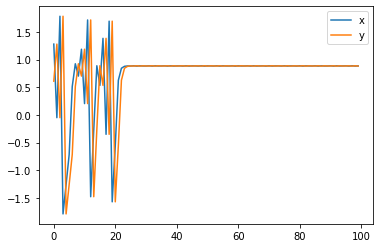

In [10]:
plt.plot(x[-100:],label='x')
plt.plot(y[-100:],label='y')
plt.legend()

In [11]:
#henon ogy
def f(p,x,y,b):
    return p - x*x + b*y
def fp(a,b):
    return (b-1.0)/2.0 + (((1.0-b)**2)/4 + a)**0.5  #fixed point
def Es(x,b):
    return -x + (x*x + b)**0.5  #stable eigenvalue
def Eu(x,b):
    return -x - (x*x + b)**0.5   #unstable eigenvalue

In [12]:
a0 = 1.4; b = 0.3 
x = [0.6]; y = [0.7] #init values
delta = 0.01 #max perturbation
xf = yf = fp(a0,b) #fixed point

lambdas = Es(x[0],b) #eigenvalues
lambdau = Eu(x[0],b)

fu = ((lambdau**2 + 1)**0.5)/(lambdau - lambdas)
fu1 = fu
fu2 = -lambdas * fu #eigenvectors

print("fixed point: ({:.4f}; {:.4f}); eigenvalues: {:.4f}; {:.4f}".format(xf,yf,lambdas,lambdau))

fixed point: (0.8839; 0.8839); eigenvalues: 0.2124; -1.4124


In [13]:
k = 0
while k <= 15:
    deltap = -lambdau*(fu1*(x[-1]-xf) + fu2*(y[-1]-yf))/fu1
    if abs(deltap) < delta:
        at = a0 + deltap
        x.append(f(at,x[-1],y[-1],b)); y.append(x[-2])
        k += 1
    else:
        k = 0;
        x.append(f(a0,x[-1],y[-1],b)); y.append(x[-2])

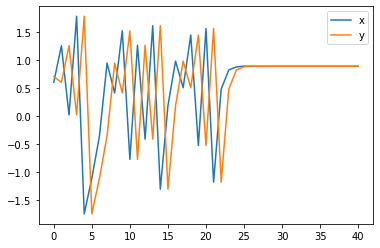

In [14]:
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.legend()

# Małe okresowe perturbacje


Kontrola chaosu dla rozpraszających układów z paramerem kontroli może być zrealizowana poprzez sprzężenie słabych okresowych oscylacji z parametrem kontroli. Rozważamy równania Lorentza
$$\frac{du_1}{dt} = \sigma (u_1 - u_2)$$
$$\frac{du_2}{dt} = ru_1 - u_1 u_2 - u_2$$
$$\frac{du_3}{dt} = u_1 u_2 - bu_3$$
Wybraliśmy takie parametry dla równania Lorentza gdzie ukła posiada dziwny atraktor np. $\sigma = 10, b = 0.4 r = 80$. Dla sprzężenia okresowych oscylacji z paremetrem kontroli zastępujemy parametr r w układzie Lorentza na
$$r \to r + k cos(\Omega t)$$
gdzie $\Omega$ jest modulacją częstotliwości a $k$ jest moduacją amplitudy. PRozważamy układ zależny od czasu
$$\frac{du_1}{dt} = \sigma (u_1 - u_2)$$
$$\frac{du_2}{dt} = (r + k cos(\Omega t))u_1 - u_1 u_2 - u_2$$
$$\frac{du_3}{dt} = u_1 u_2 - bu_3$$
Po kontroli z częstotliwością $\Omega = 6,28318$ otrzymaliśmy pierwszy okres, drugi okres oraz czwarty orbitują dla wartości $k = 2,11, k = 3, k = 36,8$.

In [15]:
from scipy.integrate import odeint

In [16]:
def dx_dt(x,t):
    return [sigma*(x[1]-x[0]), (r+k*np.cos(omega*t))*x[0]-x[0]*x[2]-x[1], x[0]*x[1]-b*x[2]]

sigma = 10.0; b = 0.4; r = 80; omega = 2*np.pi

In [17]:
x0 = [0.8, 0.8, 0.8]
k = 2.11
t = np.linspace(0,100,10000)
x = odeint(dx_dt, x0, t)

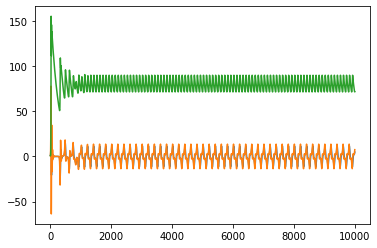

In [18]:
plt.plot(x)

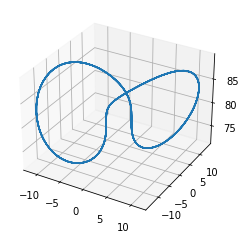

In [19]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection ='3d')
ax.plot(x[-1000:,0],x[-1000:,1],x[-1000:,2])

In [20]:
x0 = [0.8, 0.8, 0.8]
k = 3
t = np.linspace(0,100,10000)
x = odeint(dx_dt, x0, t)

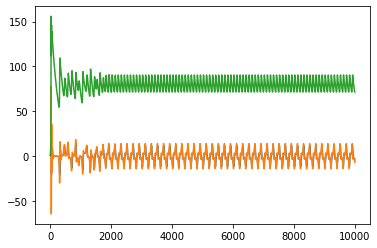

In [21]:
plt.plot(x)

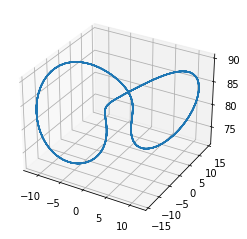

In [22]:
ax = plt.axes(projection ='3d')
ax.plot(x[-1000:,0],x[-1000:,1],x[-1000:,2])

In [23]:
x0 = [0.8, 0.8, 0.8]
k = 36.8
t = np.linspace(0,100,10000)
x = odeint(dx_dt, x0, t)

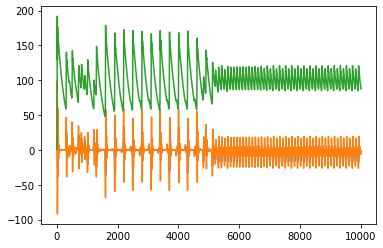

In [24]:
plt.plot(x)

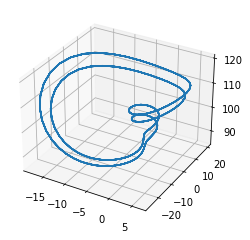

In [25]:
ax = plt.axes(projection ='3d')
ax.plot(x[-1000:,0],x[-1000:,1],x[-1000:,2])

# Synchronizacja chaosu


Aby zsynchronizować dwa chaotyczne układy kóre nazwiemy $A$ i $B$, wyobraźmy sobie, że niektóre parametry układy jednego z układów (załóżmy że B) może być dostosowany zewnętrznie. Załóżmy, że niektóre zmienne stału obu układów $A$ i $B$ mogą być zmierzone. Niektóre dynamiczne zmienne tych dwóch układów są zmierzone bazując na tym który parametr tymczasowy perturbacji jest przeliczany i stosowany do układu $B$. Zakładamy, że przed synchronizacją niektóre informacje dotyczące struktury geometrycznej atraktora chaotycznego (np. Macierze jakobiego wzdłóż długiej chaotycznej trajektorii która praktycznie pokrywa cały atraktor) zostały pozyskane. Bazując na tym pomiarze i naszej wiedzy na temat układu (najpierw możemy na przykład obserwować i studiować układ), kiedy jest określone, że statyczne zmienne dla $A$ i $B$ są blisko, obliczamy mały parametr perturbacko bazując na algortymie Ott-Gerbogi-Yorke i stosujemy go w układzie $B$. Dwa układy mogą wtedy być zsynchronizowane, jednakże ich trajektorie są wciąż chaotyczne. będąc pod wpływem zewnętrznego szumu jest skończone prawdopodobieństwo, że dwie wcześniej zsynchronizowane trajektorie mogą stracić synchronizację. Jednakże z pewnym prawdopodobieństwiem trajektorie $A$ i $B$ mogą ponownie być zsynchronizowane. W takim sensie metoda synchronizacji jest silna przeciwko małym zewnętrznym szumom.
Rozważamy dwa prawie jednakowe chaotyczne układy, które mogą być opisane przez dwuwymiarowe odwzorowanie na powierzchni Poincarea
$$x_t+1 = f(x_t,r_0) |A|, \space \space y_t+1 = f(y_t,r) |B|$$
gdzie $x_t,y_t \in R^2 , f$ jest gładką funkcją w jej zmiennych, $r_0$ dla układu $A$ jest ustaloną wartością parametru, $r$ jest dla układu $B$ zewnętrznym parmetrem kontrolowanym. Dla celu synchronizacji wymagamy, by dynamika nie powinna być znacząco różna dla układu $A$ i $B$. Innymi słowy każdy parametr perturbacji powinien być mały. Przez to wymagamy, by
$$|r - r_0 | < \Sigma$$
gdzie $\Sigma$ jest małą liczbą zdewiniowaną w zasięgu wariacji parametru. Zakładamy, że dwa układy zaczynają z innymi warunkami początkowymi. W uogólnieniu wynikające chaotyczne trajektorie są kompletnie niepowiązane. Jednak przez ergodyczność z prawdopodobieństwem 1 do 2 trajektorie mogą arbitralnie przybliżyć się do siebie w późniejszym czasie $n_c$. Bez kontrololowania obie trajektorie ponownie się od siebie rozdzielą. Celem jest aby parametr $r$ był dostosowany w taki sposób by $|y_t - x_t | \to 0$ dla $n \geq n_c$ co oznacza, że $A$ i $B$ są zsynchronizowane w $t \geq t_c$.
Lineralizowana dynamika w otoczeniu "celu" trajektorii {$x_t$} jest następująca
$$y_t+1 - x_t+1 (r_0) = J(y_t+1 - x_t+1 (r_0)) + V(\Delta r)_t$$
gdzie $r_t := r_0 + (\Delta r)_t, (\Delta r) \leq \Sigma, J$ jest macierzą Jacobiego $2 \space x \space 2$  a $V$ jest dwuwymiarowym wektorem kolumnowym
$$J := D_y f(y,r)|_{y=x,r=r_0}, \space \space V := D_r f(y,r)|{_y=x,r=r_0}$$
Właściwością chaotycznej trajektorii jest istnienie zarówno w stabilnym i niestabilnym kierunku dla praktycznie każdego punktu trajektorii.
Niech $e_{u(t)}$ będzie stabilnym i niestabilnym wektorem jednostkowym dla $x_t$ oraz $f_{s(t)}$ oraz $f_{u(t)}$ będą dwoma wektorami jednostkowymi które spełniają
$$f_{u(t)} * e_{u(t)} = f_{s(t)} * e_{s(t)} = 1$$
$$f_{u(t)} * e_{s(t)} = f_{s(t)} * e_{u(t)} = 0$$
Aby ustabilizować {$y_t$} wokół {$x_t$}, wymagane jest by następna iteracja $x_t$ po wpadnięciu w małe sąsiedztwo wokół $x_t$ by leżało na stabilnym kierunku w $x_{t+1} (r_0)$ np.
$$[y_{t+1} - x_{t+1} (r_0)] * f_{u(t+1)}$$
Otrzymujemy wyrażenie dla parametru perturbacji
$$(\Delta r)_t = \frac{(J[y_t - x_t (r_0)]) * f_{u(t+1)}}{-V*f_{u(t+1)}}$$
Jeśli $(\Delta r)_t > \Sigma$ ustawiamy $(\Delta r)_t = 0$. Zauważmy, że $f_{u(t)}$ może być przeliczone w odniesieniu do $J$.
Ilustrujemy nasz algorytm synchronizacji przez wykorzystanie odzorowania Henona.
$$x_{1t +1} = a - x^2_{1t} + 0,3x_{2t} ,\space \space x_{2t+1} = x_1t$$
gdzie $a$ jest parametrem kontrolnym. Rozważając dwa układy Henona
$$x_{1t +1} = a - x^2_{1t} + 0,3x_{2t} ,\space \space x_{2t+1} = x_1t$$
$$y_{1t +1} = a - y^2_{1t} + 0,3y_{2t} ,\space \space y_{2t+1} = y_1t$$
Otrzymujemy
$$J = \begin{pmatrix}-2x_1 & b \\ 1 & 0 \end{pmatrix}, \space\space V = \begin{pmatrix}1 \\ 0\end{pmatrix}$$
Wartości własne oraz wektory własne dla $J$ są dane przez
$$\lambda_s = -x_1 + \sqrt{b + x^2_1}, \space\space \begin{pmatrix}\lambda_s \\ 1\end{pmatrix}, \space\space\space \lambda_u = -x_1 + \sqrt{b + x^2_1}, \space\space \begin{pmatrix}\lambda_u \\ 1\end{pmatrix}.$$
Jeden układ ma ustaloną wartość parametru ($a = a_0 = 1,4$) co służy celowi a w drugim układzie dostosowujemy $a$ w małym zasięgu (1,39 i 1,41). W czasie $t = 0$ rozpoczynamy oba układy z różnymi warunkami początkowymi. Dwa układy następnie poruszają się po całkowicie niepowiązanych chaotycznych trajektoriach. W pewnym momentcie punkty trajektorii dla niesprzężonych układów zaczynają się do siebie zbliżać w otoczeniu epsilona. Kiedy to zachodzi włączamy perturbacje parametryczne.

In [26]:
#Synchro Henon
x1 = [0.5]; x2 = [-0.8]
y1 = [0.001]; y2 = [0.001]
T = 2200
b = 0.3; a = 1.4; a0 = 1.4

In [27]:
for t in range(T):
    x1.append(a0 - x1[-1]**2 + b*x2[-1]); x2.append(x1[-2])
    y1.append(a - y1[-1]**2 + b*y2[-1]); y2.append(y1[-2])
    distance = abs(x1[-1]-y1[-1]) + abs(x2[-1] - y2[-1])
    eps = 0.01
    rang = 0.01
    
    if distance < eps:
        t1 = a0 - x1[-1]**2 + b*x2[-1]
        t2 = x1[-1]
        lams = -t1 + (t1**2 + b)**0.5
        lamu = -t1 - (t1**2 + b)**0.5
        
        f1 = (lamu**2 +1)**0.5 / (lamu-lams)
        f2 = -f1*lams
        deltaa = -((-2.0*x1[-1]*(y1[-1]-x1[-1])+b*(y2[-1]-x2[-1]))*f1+(y1[-1]-x1[-1])*f2)/f1
        
        if abs(deltaa) < rang: a = a0 +deltaa
        

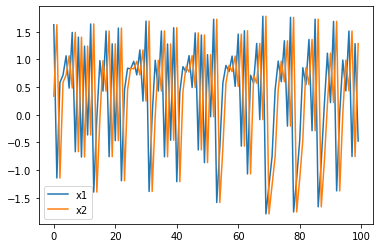

In [28]:
plt.plot(x1[-100:],label='x1')
plt.plot(x2[-100:],label='x2')
plt.legend()

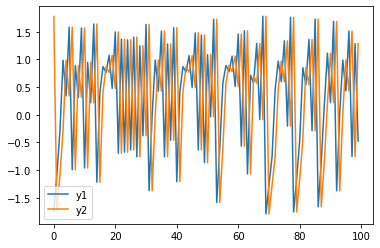

In [29]:
plt.plot(y1[-100:],label='y1')
plt.plot(y2[-100:],label='y2')
plt.legend()

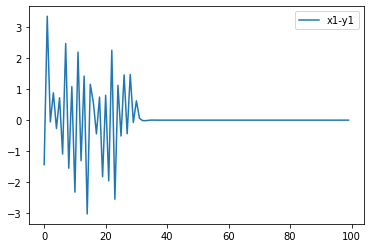

In [30]:
delta1 = [x1[i]-y1[i] for i in range(T)]
plt.plot(delta1[-100:],label='x1-y1')
plt.legend()


Pecora i Carroll pokazali,że specyficzne podukłady układów chaotycznych mogą być zsynchronizowane poprzez łączenie ich wspólnymi sygnałami. To kryterium wskazuje jednocześnie na jednowymiarową eksponentę sub-Liapunova. Załóżmy chaotyczny układ opisany przez autonomiczny układ równania różniczkowego pierwszego rzeędu z n wektorami stanu:
$$\frac{du}{dt} = f(u).$$
Dzielimy dynamiczny układ na dwa podukłady
$$u^T = (v,w)^T$$
$$\frac{dv}{dt} = g(v,w),\space\space \frac{dw}{dt} = h(v,w)$$
gdzie $v  = (u_1,u_2,...f_n), g = (f_1,f_2,...f_m), w = (u_m+1,u_m+2,...u_n)$, oraz $h = (f_m+1,f_m+2,...f_n)$. Tworzymy nowy podukład $w'$ identyczny do $w$ przez zastąpienie zestawu zmiennych $w$ dla odpowiadających im w $w'$ w funkcji $h$. To prowadzi do układu
$$\frac{dv}{dt} = g(v,w),\space\space\space \frac{dw}{dt} = h(v,w),\space\space\space \frac{dw'}{dt} = h(v,w').$$
Niech
$$\Delta w := w' - w$$
Komponenty podukładu $w$ i $w'$ będą się synchronizować tylko wtedy kiedy $\Delta w \to 0$ gdy $t \to \infty$. W infinitezymalnej granicy prowadzi to do równiania wariacyjnego dla podukładu.
$$\frac{dy}{dt}m= D_w h(v(t),w(t))y$$
gdzie D_w h jest macierzą Jacobiego dla pola wektorowego $w$ w podukładzie w odniesieniu tylko i wyłącznie do $w$.
Twierdzenie Pecora i Carrolla mówi to tym że podukłady $w$ i $w'$ będą zsynchronizowane tylko jeśli jednowymiarowe eksponenty Lupinova dla podukładu $w'$ będą negatywne.
To twierdzenie jest koniecznym ale nie wystarczającym warunkiem synchronizacji. Nie mówi ono nic o zbiorze warunków początkowych w których $w'$ będą się synchronizować z $w$.
Układ chaotyczy, dla przykładu ma przynamniej jedną dodatnią jednowymiarową eksponentę Lupinova. Jako układ reakcji podukładu wszystkie jednowymiarowe eksponenty Lupinova muszą być mniejsze od zera aby mógł się synchronizować z układem napędowym.
Jako przykład rozważamy model Rosslera
$$\frac{du_1}{dt} = -u_2 - u_3,\space \space \space \frac{du_2}{dt} = u_1 + au_2,\space \space \space \frac{du_3}{dt} =b + u_3 (u_1 - c)$$
gdzie a,b oraz c są dodatnymi stałymi. Podrzednym układem jest
$$\frac{du'1}{dt} = -u_2 - u'_3,\space \space \space \frac{du'_3}{dt} =b + u'_3 (u'_1 - c)$$
Dzięki temu w układzie Rosslera możliwym jest użycie komponentu $u_2$ by kierować układem odpowiedzi $(u'_1,u'_3)$ i otrzymać synchronizację z komponentami $(u_1,u_3)$ .


In [31]:
#Rossler
def Rossler(x, t):
    a = 0.2; b = 0.2; c = 9.0
    return [-x[1]-x[2], x[0] + a*x[1], b + x[2]*(x[0] - c), -x[1] - x[4], b + x[4]*(x[3] - c)]

In [32]:
x0 = [0.8, 0.4, 0.8, 1.1, 2.3] #initial conditions
t = np.linspace(0,500,100000)
x = odeint(Rossler, x0, t)

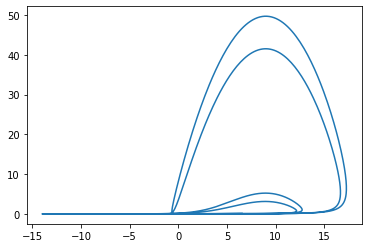

In [34]:
plt.plot(x[-10000:,3],x[-10000:,4])

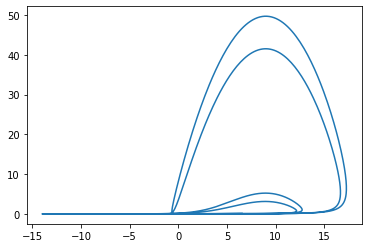

In [35]:
plt.plot(x[-10000:,0],x[-10000:,2])

# Układy o sprzężonej fazie


W tej sekcji rozważamy stabilność klasy sprzężonych identycznych autonomicznych układów nieliniowych równań różniczkowych pierwszego rzędu.
Te sprzężenia grają centralną rolę w synchronizacji układów chaotycznych i moga być zastosowane w obwodach elektrycznych. Jako zastosowanie rozważamy dwa sprzężone równania Van der Pola oraz dwa sprzężone odwzorowania logistyczne. Kiedy niesprzężony układ dopuszcza pierwszą różniczkę badamy, czy pierwsza różniczka istnieje w sprzężonym układzie. Na koniec omawiana jest relacja eksponent Liapunova dla sprzężonych i niesprzężonych układów.
Biorąc pod uwagę autonomiczny układ dla zwyczajnych równań różniczkowych pierwszego rzędu $$\frac{du}{dt}=f(u),$$ $$u = (u_1,u_2....,u_n)^T$$
Zakładamy, że funkcje $f_j : R^n  \to R$ są analityczne. zakładamy, że $u^*$ jest stałym punktem układu. Równaniem zmiennych dla dynamicznego układu jest dane przez $$\frac{dy}{dt}=\frac{df}{du}(u(t))y$$
gdzie $\frac{df}{du}$ jest macierzą Jacobiego. Dokładając stały punkt $u^*$ do macierzy Jacobiego skutkuje macierzą $n\space x \space n$ 
$$A:=\frac{\partial f}{\partial u}(u^*)$$
ze stałymi współczynnikami. Wartości własne $\lambda _1,...\lambda _n$ tej macierzy determinują stabilność stałego punktu $u^*$. Dodatkowo wartości własne dają nam informacje na temat tego, czy może zajść rozwidlenie Hopfa. W takim przypadku zakładamy że f zależy od parametru rozwidlenia. Ponadto układ ten jest używany do znajdowania jednowymiarowych elsponent Liapunova.
W kontrolowaniu chaosu dla autonomiczynch jednowymiarowych układów sprzężenie dwóch jednakowych układów zgodnie z 
$$\frac{du}{dt}=f(u) +c(v-u),$$ $$\frac{dv}{dt}=f(v) + c(u-v)$$
gra centralną rolę. Tutaj $n \geq 3$ i $c \in R$. Po pierwsze musimy wiedzieć, że $(u^*,v^*)$ z $v^*=u^*)$ są stałymi punktami dla układu $du/dt = f(u)$. Dodając stały punkt $(u^*,u^*)$ do macierzy Jakobiego otrzymujemy macierz $2n \space x \space 2n$. Następnie z $2n$ wartości własnych dla niesprzężonego układu możemy określić stabilność stałego punktu $(u^*,u^*)$ dla sprzężonego układu fazowego.
W poniższym programie rozważamy dwa sprzężone fazowo modele Lorentza. Wartości parametryczne dla tych modeli wynoszą $\sigma = 16, r = 40, b = 4$. Dla tych wartości mamy numeryczny dowód, że układ wykazuje chaotyczne zachowanie. Największa jednowymiarowa eksponenta Liapunova jest dana przez $\lambda = 1,37$. Przez to obraz fazowy $(u_1,v_1)$ dla $c=0.7$ jest linią prostą. Dla $c= 0.45$ mamy $2c < \lambda$ i te układy są poza fazą. Dodatkowo obraz fazowy nie jest już dłużej linią prostą. Obraz fazowy jest wyświetlony dla różnych wartości $c$.

In [36]:
#phase coupling
def CoupledLorentz(x,t):
    sigma = 16.0; r = 40.0; b = 4.0
    dx0 = sigma * (x[1] - x[0]) + c * (x[3] - x[0])
    dx1 = -x[0]*x[2] + r * x[0] - x[1] + c * (x[4] - x[1])
    dx2 = x[0]*x[1] - b * x[2] + c * (x[5] - x[2])
    dx3 = sigma * (x[4] - x[3]) + c * (x[0] - x[3])
    dx4 = -x[3]*x[5] + r * x[3] - x[4] + c * (x[1] - x[4])
    dx5 =  x[3]*x[4] - b *x[5] + c * (x[2] - x[5])
    return dx0, dx1, dx2, dx3, dx4, dx5

In [37]:
c = 0.7
x0 = [0.8, 0.8, 0.8, 1.0, 0.4, 0.3]
t = np.linspace(0,500,10000)
x = odeint(CoupledLorentz, x0, t)

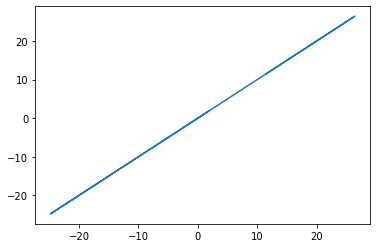

In [38]:
plt.plot(x[-1000:,0],x[-1000:,3])

In [39]:
c = 0.5
x0 = [0.8, 0.8, 0.8, 1.0, 0.4, 0.3]
t = np.linspace(0,500,10000)
x = odeint(CoupledLorentz, x0, t)

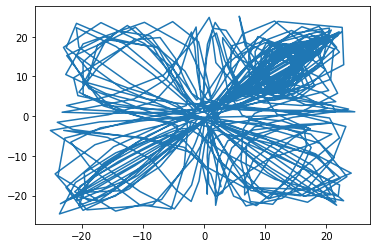

In [40]:
plt.plot(x[-1000:,0],x[-1000:,3])

# Bibliografia
1. Steeb, W-H. \textit{The nonlinear workbook}, World Scientific, 2005